### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [2]:
df = pd.read_csv('../../../Datasets/RQ1/bower_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,v0.1.1,2012-09-16,1347830400,4.6,0,1.0,1.0,371,226,1149
1,1,v0.1.2,2012-09-16,1347831468,4.6,0,1.0,1.0,372,227,1149
2,2,v0.2.0,2012-09-25,1348606567,4.6,0,1.0,1.0,384,233,1206
3,3,v0.3.0,2012-10-22,1350945621,4.0,0,1.0,1.0,538,361,1672
4,4,v0.3.1,2012-10-31,1351706318,4.0,0,1.0,1.0,554,382,1705
5,5,_pr796_author_head,2013-10-03,1380825701,2.4,0,1.0,1.0,1888,1006,8332
6,6,v0.10.0,2013-07-02,1372792692,2.9,0,1.0,1.0,1413,1058,5174
7,7,v0.7.0,2013-02-01,1359679000,3.2,0,1.0,1.0,1035,840,3496
8,8,v0.8.0,2013-02-24,1361722813,3.0,0,1.0,1.0,1242,956,4412
9,9,v0.8.1,2013-02-25,1361835591,3.0,0,1.0,1.0,1240,952,4409


### Information of the Dataframe 

In [3]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,38.000000,3.800000e+01,38.000000,38.0,38.0,38.0,38.000000,38.000000,38.000000
mean,18.500000,1.458575e+09,2.534211,0.0,1.0,1.0,2758.315789,1421.552632,13763.052632
std,11.113055,9.075701e+07,0.802454,0.0,0.0,0.0,1335.191860,622.035399,7939.686933
min,0.000000,1.347830e+09,1.900000,0.0,1.0,1.0,371.000000,226.000000,1149.000000
25%,9.250000,1.383855e+09,1.900000,0.0,1.0,1.0,1940.250000,1077.750000,8550.500000
50%,18.500000,1.444363e+09,2.300000,0.0,1.0,1.0,2937.000000,1406.500000,13737.500000
75%,27.750000,1.522262e+09,2.500000,0.0,1.0,1.0,4177.750000,2114.500000,23005.000000
max,37.000000,1.647272e+09,4.600000,0.0,1.0,1.0,4184.000000,2127.000000,23240.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            38 non-null     int64  
 1   version               38 non-null     object 
 2   release_date          38 non-null     object 
 3   timestamp             38 non-null     int64  
 4   sqale_debt_ratio      38 non-null     float64
 5   vulnerabilities       38 non-null     int64  
 6   security_rating       38 non-null     float64
 7   sqale_rating          38 non-null     float64
 8   complexity            38 non-null     int64  
 9   cognitive_complexity  38 non-null     int64  
 10  ncloc                 38 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 3.4+ KB


### Updating Version Names

In [5]:
df['version'] = df['version'].str.replace('v', '')

In [6]:
df['version'] = 'v' + df['version']
df['version']

0                   v0.1.1
1                   v0.1.2
2                   v0.2.0
3                   v0.3.0
4                   v0.3.1
5      v_pr796_author_head
6                  v0.10.0
7                   v0.7.0
8                   v0.8.0
9                   v0.8.1
10                  v1.0.0
11                  v1.0.1
12    v_pr1129_author_head
13                  v1.3.0
14                  v1.3.1
15                  v1.4.0
16                  v1.4.1
17                  v1.4.2
18                  v1.5.0
19                  v1.5.1
20                  v1.7.3
21                  v1.7.5
22                  v1.7.6
23                  v1.7.7
24                  v1.7.8
25                  v1.8.2
26                  v1.8.2
27                  v1.8.3
28                  v1.8.4
29                  v1.8.5
30                  v1.8.6
31                  v1.8.7
32                  v1.8.8
33                 v1.8.10
34                 v1.8.11
35                 v1.8.12
36                 v1.8.13
3

### Sorting accoriding to the timeframe

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v0.1.1,2012-09-16,1347830400,4.6,0,1.0,1.0,371,226,1149
1,v0.1.2,2012-09-16,1347831468,4.6,0,1.0,1.0,372,227,1149
2,v0.2.0,2012-09-25,1348606567,4.6,0,1.0,1.0,384,233,1206
3,v0.3.0,2012-10-22,1350945621,4.0,0,1.0,1.0,538,361,1672
4,v0.3.1,2012-10-31,1351706318,4.0,0,1.0,1.0,554,382,1705
5,v_pr796_author_head,2013-10-03,1380825701,2.4,0,1.0,1.0,1888,1006,8332
6,v0.10.0,2013-07-02,1372792692,2.9,0,1.0,1.0,1413,1058,5174
7,v0.7.0,2013-02-01,1359679000,3.2,0,1.0,1.0,1035,840,3496
8,v0.8.0,2013-02-24,1361722813,3.0,0,1.0,1.0,1242,956,4412
9,v0.8.1,2013-02-25,1361835591,3.0,0,1.0,1.0,1240,952,4409


## Correlation

In [9]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

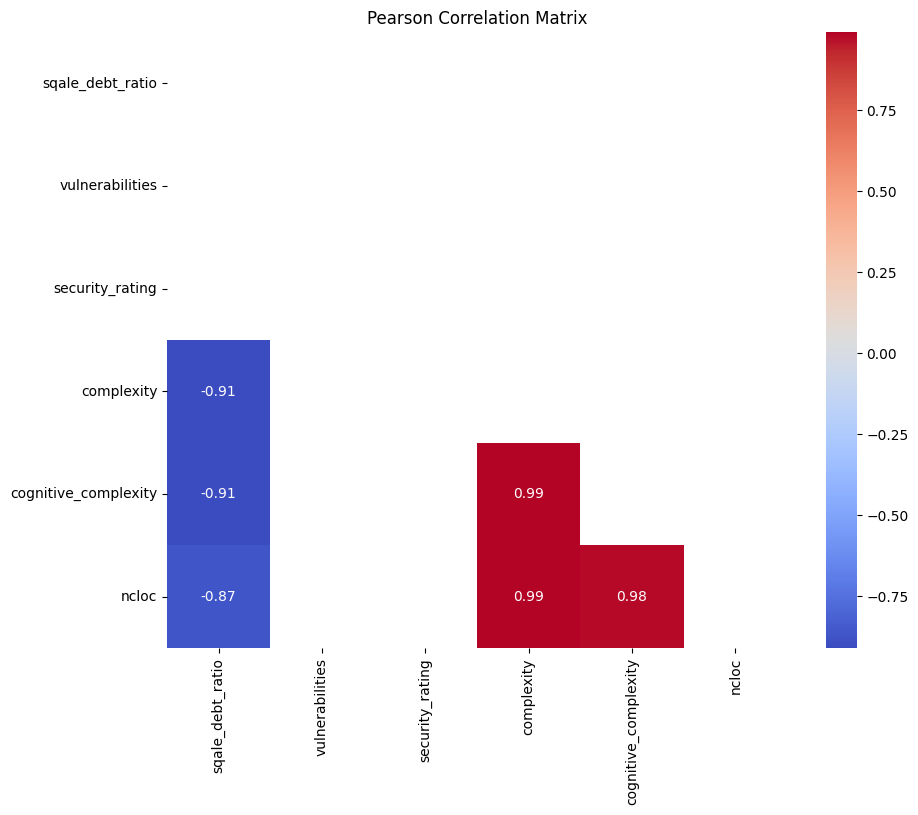

In [10]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

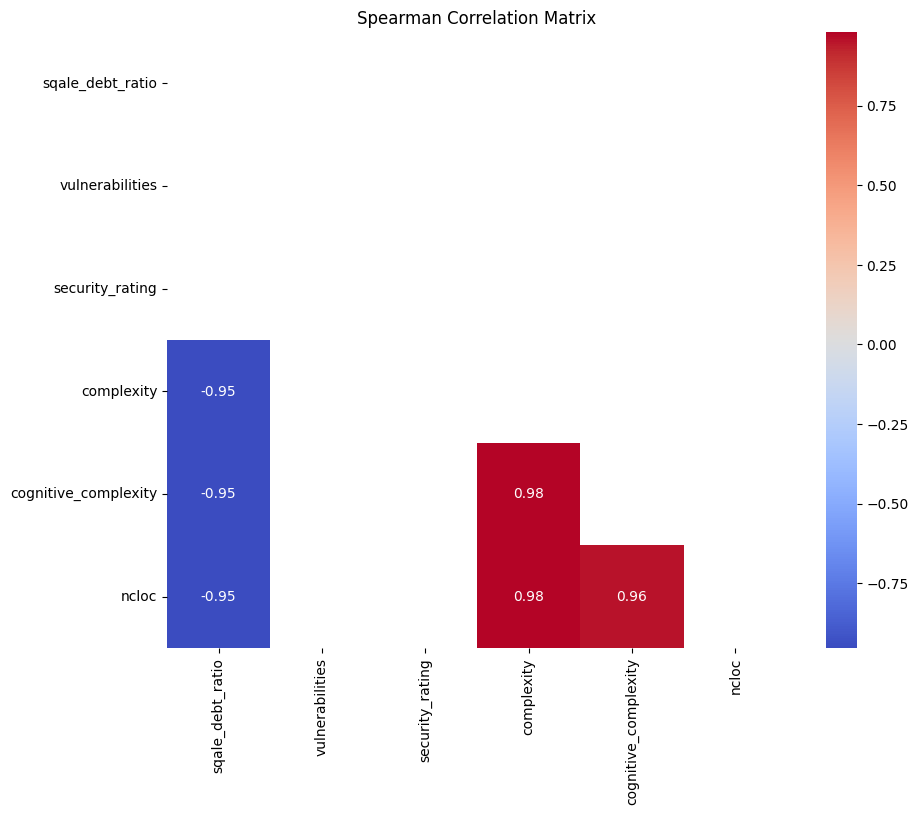

In [11]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [12]:
df['timestamp']

0     1347830400
1     1347831468
2     1348606567
3     1350945621
4     1351706318
5     1380825701
6     1372792692
7     1359679000
8     1361722813
9     1361835591
10    1410136588
11    1410136588
12    1392941224
13    1394486876
14    1394580432
15    1427755590
16    1427873754
17    1448384866
18    1440333270
19    1440340627
20    1453310607
21    1453759027
22    1453892808
23    1453905433
24    1459789208
25    1505321992
26    1522260987
27    1522259562
28    1522262609
29    1547731144
30    1547732668
31    1547764549
32    1548278130
33    1610646142
34    1610967636
35    1610984512
36    1636945845
37    1647272221
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [13]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [14]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
1.9    12
2.3     7
2.2     4
4.6     3
2.4     3
2.5     3
4.0     2
3.0     2
2.9     1
3.2     1
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
0    38
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
1.0    38
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    38
Name: count, dtype: int64
------------------------
Count for complexity
complexity
4179    5
2839    2
4178    2
3232    2
2345    2
2098    2
3201    2
2936    1
4184    1
4174    1
4173    1
4181    1
4177    1
3203    1
2938    1
371     1
372     1
2853    1
2097    1
1240    1
1242    1
1035    1
1413    1
1888    1
554     1
538     1
384     1
4182    1
Name: count, dtype: int64
------------------------
Count for cognitive_complexity
cognitive_complexity
2115    5
2117    2
2113    2
1573    2
1540    2
1187    2
1142    2
1295    2
226     1

### Categorical Columns Visulaization

C:\Users\sadik\AppData\Local\Temp\ipykernel_9636\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_9636\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_9636\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\sadik\AppData\Local\Temp\ipykernel_9636\130

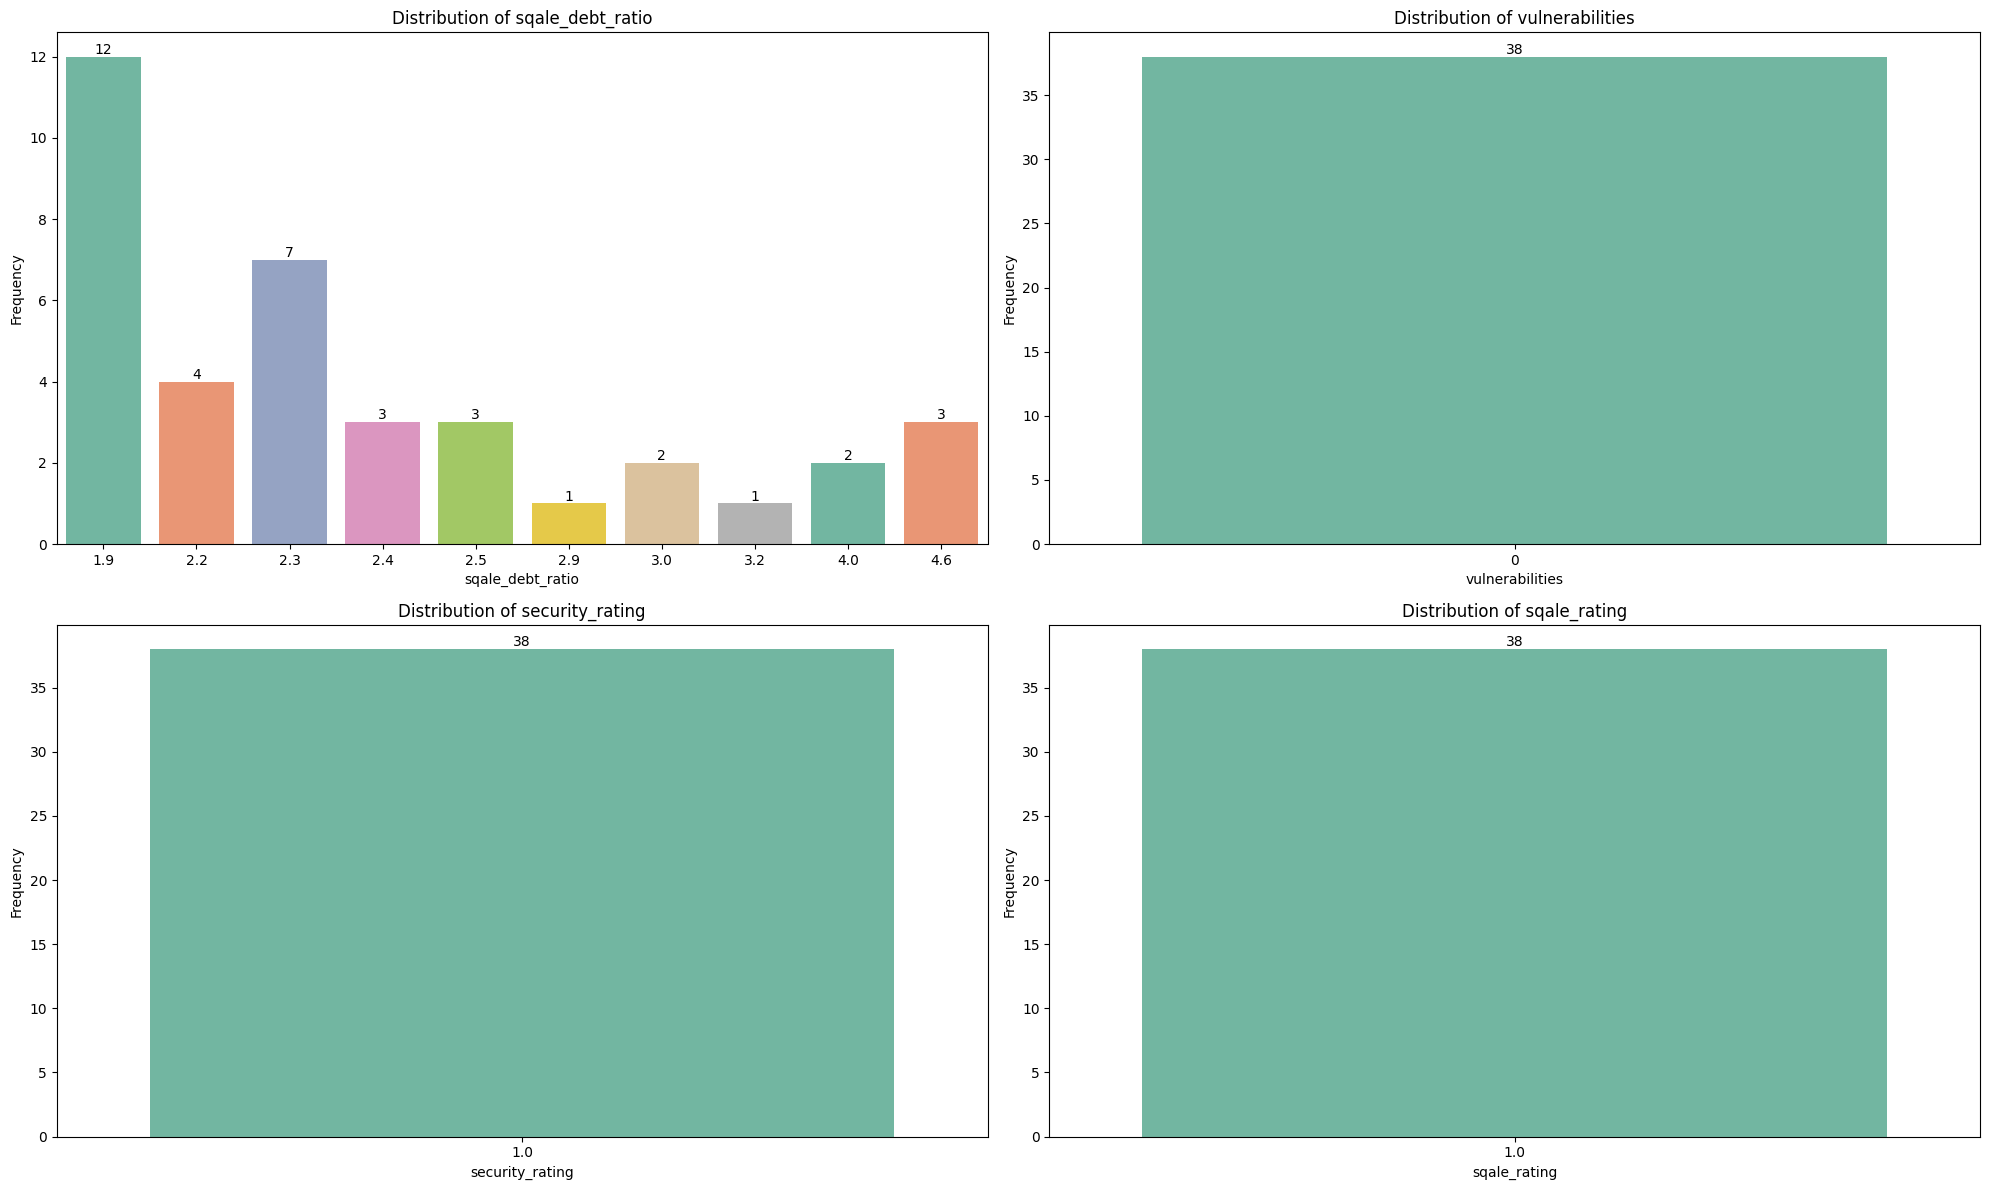

In [15]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

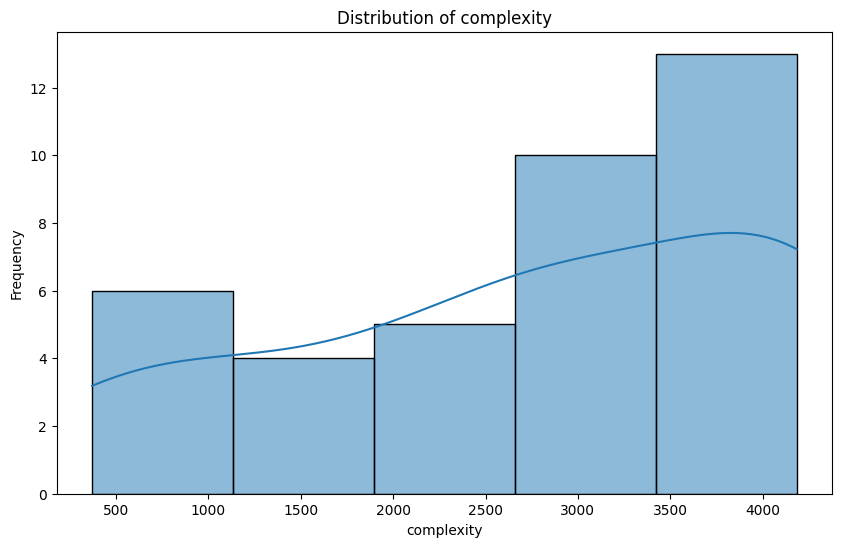

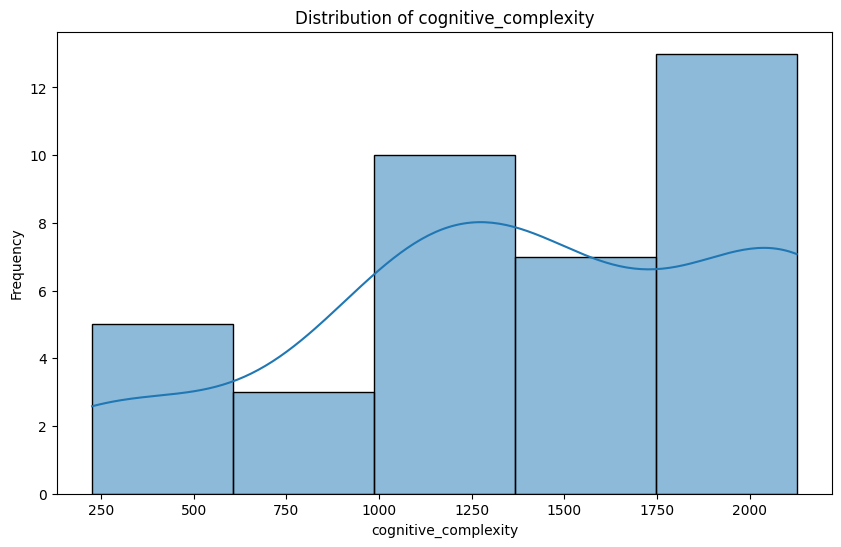

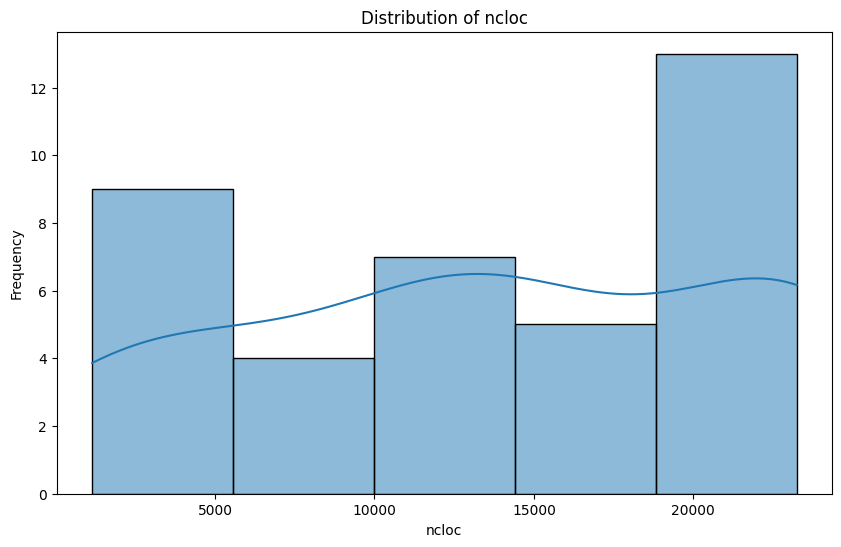

In [16]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot

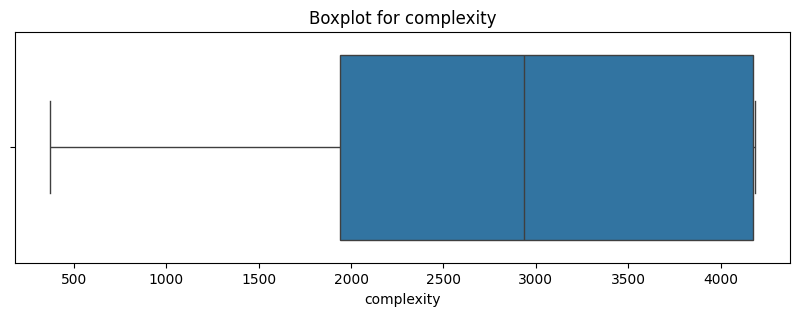

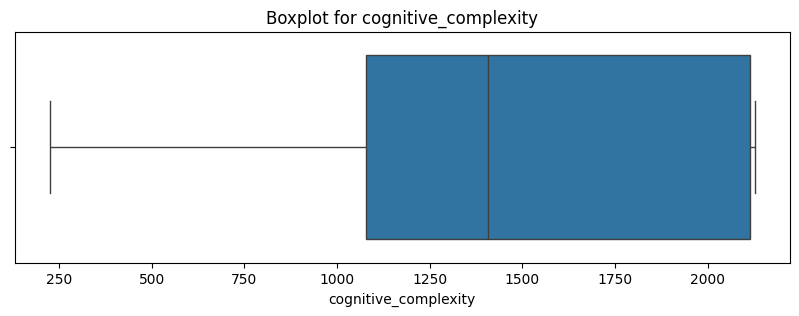

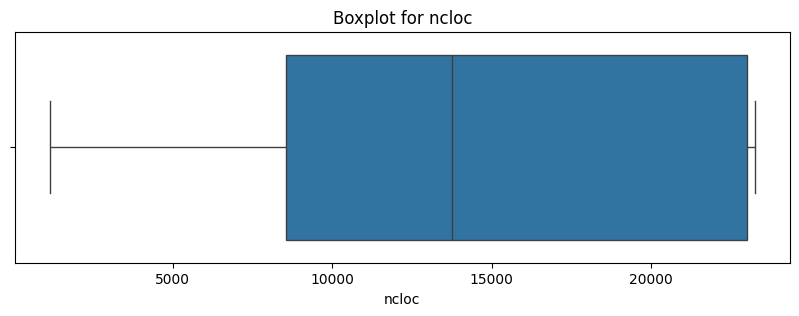

In [17]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Visualizing every column using Pairplot

In [18]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

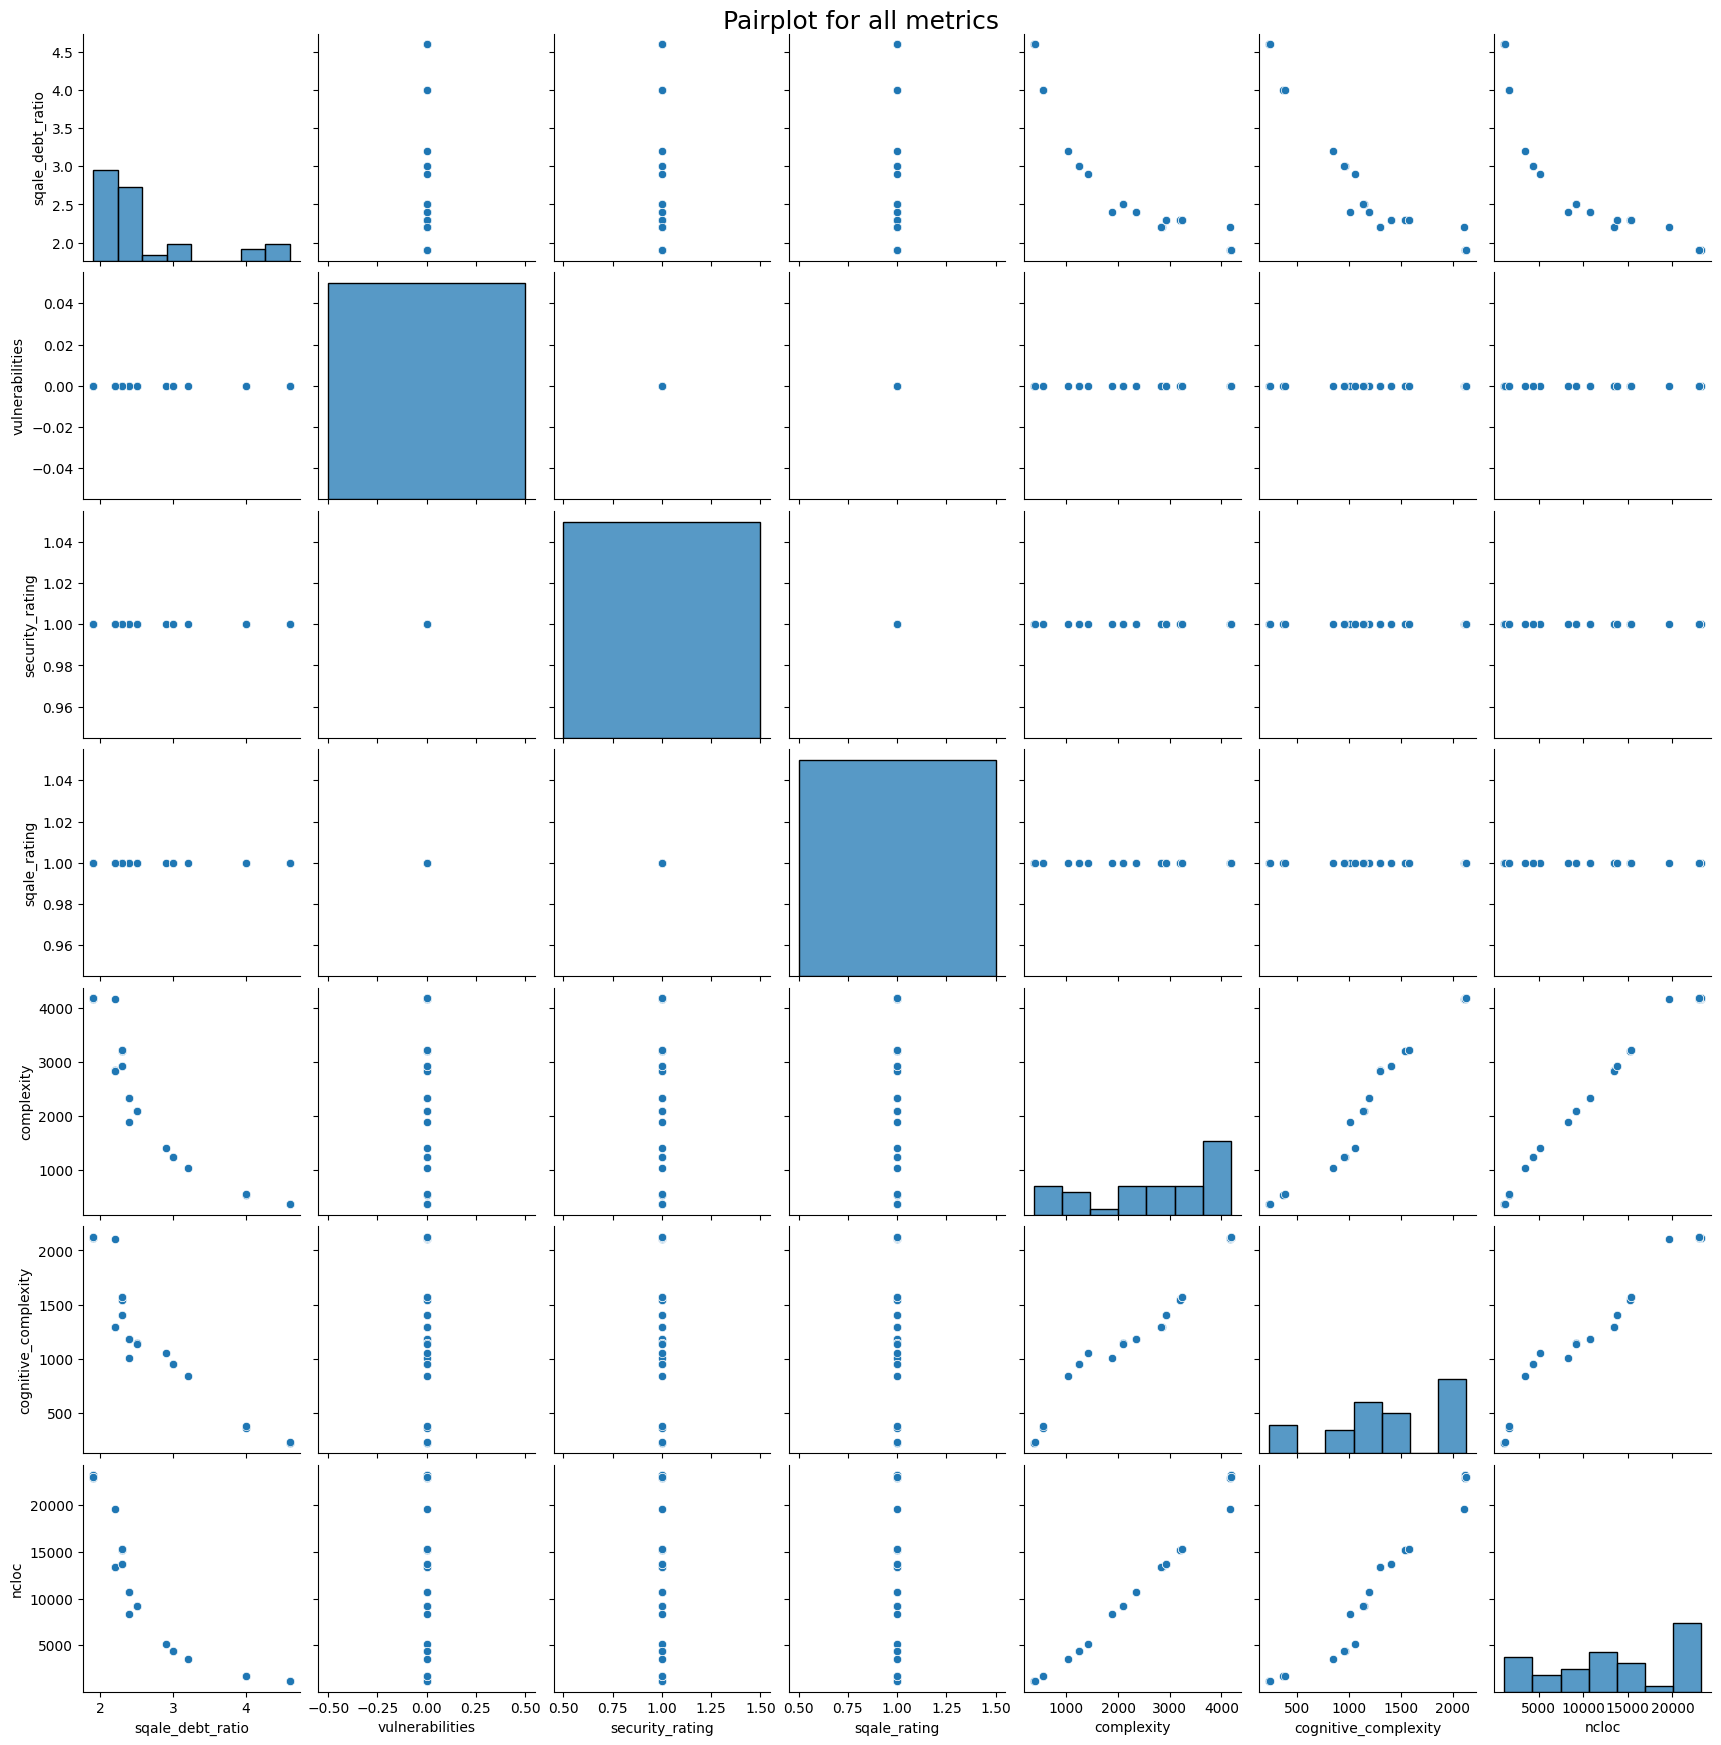

In [19]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [20]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 33931.49399596405
R-squared: 0.9832051692708029

Decision Tree Model for complexity:
Mean Squared Error: 3688.125
R-squared: 0.998174514947957

Random Forest Model for complexity:
Mean Squared Error: 4079.365471961809
R-squared: 0.9979808654286699

Gradient Boosting Model for complexity:
Mean Squared Error: 3633.6499445984196
R-squared: 0.9982014780794519

Support Vector Model for complexity:
Mean Squared Error: 82125.01670638355
R-squared: 0.9593511634241553

MLP Regressor Model for complexity:
Mean Squared Error: 434505.6747481606
R-squared: 0.784935810396709

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 15194.216287328712
R-squared: 0.9632515943576286

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 1356.25
R-squared: 0.9967198028374764

Random Forest Model for cognitive_complexity:
Mean Squared Error: 2038.541462847223
R-squared: 0.9950696273385303

Gradient Boosting Model for cog

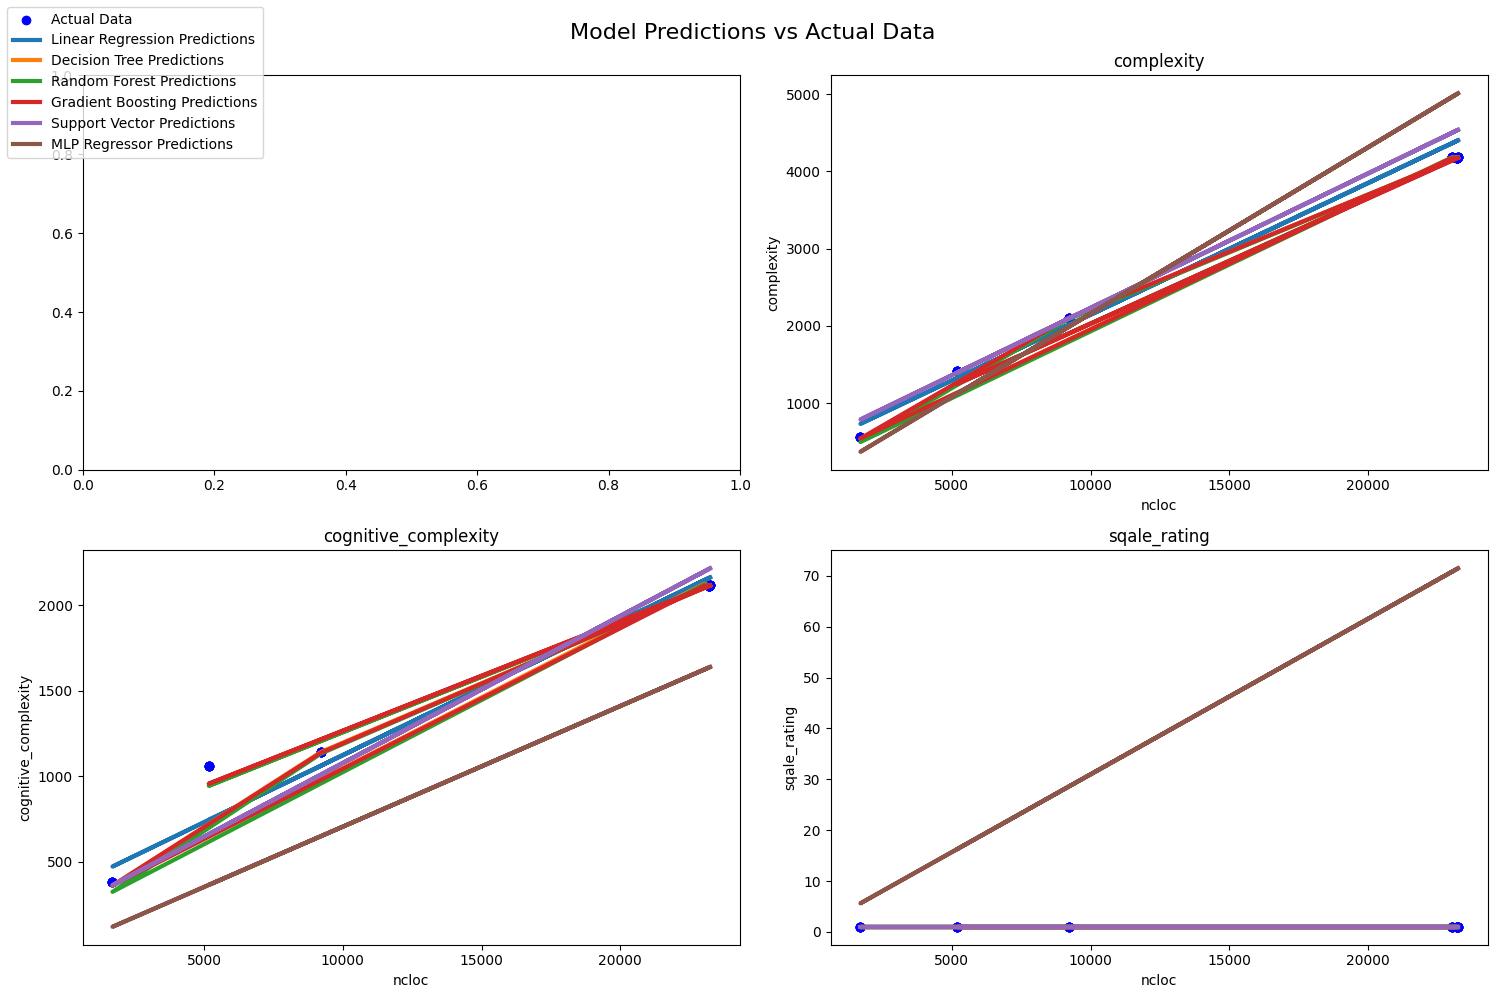

In [22]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 21375.766296673435
R-squared: 0.9894197886865161

Ensemble Model for cognitive_complexity:
Mean Squared Error: 9704.138693270119
R-squared: 0.976529778280995

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



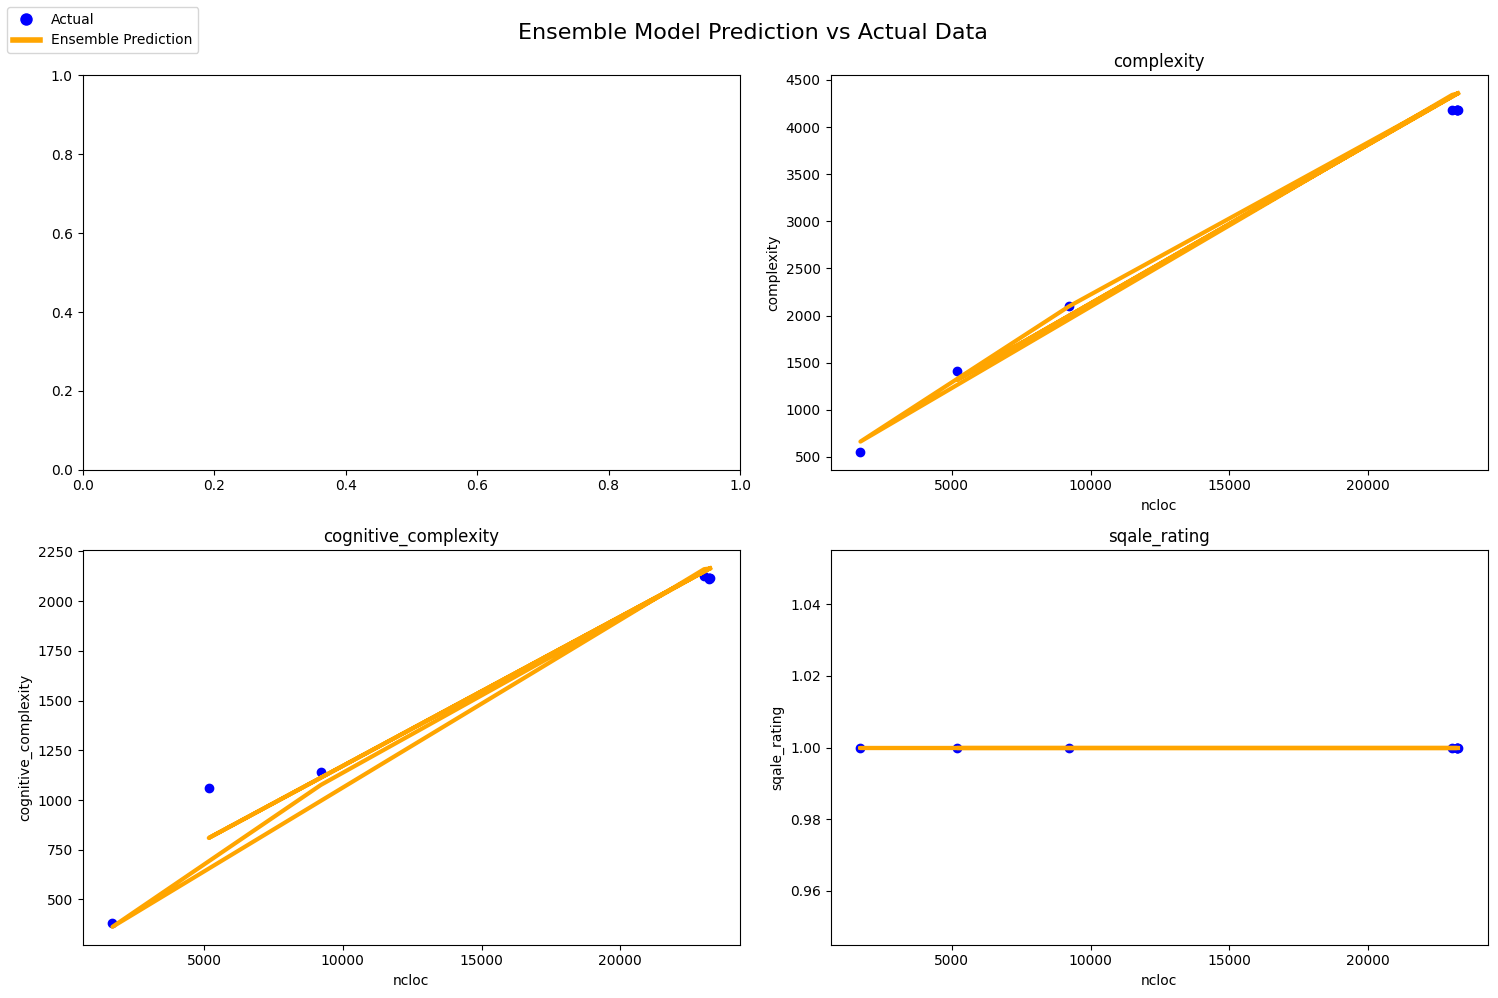

In [23]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()